In [1]:
pip install pandas numpy matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
import pandas as pd
# Try reading the CSV file with a different encoding
df = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')



In [13]:
print(df.head())

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13  

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            1245 non-null   object 
 1   Summary                   1245 non-null   object 
 2   Precip Type               1245 non-null   object 
 3   Temperature (C)           1245 non-null   float64
 4   Apparent Temperature (C)  1245 non-null   float64
 5   Humidity                  1245 non-null   float64
 6   Wind Speed (km/h)         1245 non-null   float64
 7   Wind Bearing (degrees)    1245 non-null   int64  
 8   Visibility (km)           1245 non-null   float64
 9   Loud Cover                1245 non-null   int64  
 10  Pressure (millibars)      1245 non-null   float64
 11  Daily Summary             1245 non-null   object 
 12  station_id                1245 non-null   object 
 13  city_name                 1244 non-null   object 
 14  country 

In [17]:
print(df.describe())

       Temperature (C)  Apparent Temperature (C)     Humidity  \
count      1245.000000               1245.000000  1245.000000   
mean         15.880183                 15.596296     0.730964   
std           6.149127                  6.713622     0.174459   
min           0.955556                 -0.866667     0.320000   
25%          11.438889                 11.438889     0.600000   
50%          15.694444                 15.694444     0.750000   
75%          19.977778                 19.977778     0.890000   
max          32.638889                 35.494444     1.000000   

       Wind Speed (km/h)  Wind Bearing (degrees)  Visibility (km)  Loud Cover  \
count        1245.000000             1245.000000      1245.000000      1245.0   
mean           10.198180              206.414458        11.061502         0.0   
std             6.242585               94.260006         3.225386         0.0   
min             0.000000                0.000000         0.289800         0.0   
25%      

In [21]:
print(df.isnull().sum())

Formatted Date               0
Summary                      0
Precip Type                  0
Temperature (C)              0
Apparent Temperature (C)     0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
Daily Summary                0
station_id                   0
city_name                    1
country                      0
state                       28
iso2                         6
iso3                         0
latitude                     0
longitude                    0
dtype: int64


In [23]:
df = df.dropna()

In [25]:
print(df.head(5))

                  Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                     251          15.8263           0               1015.13  

In [34]:
#1.Are there any countries with cities located at extreme latitudes, and how might this impact their climate?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
city_data = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')

In [52]:
extreme_cities = city_data[(city_data['latitude'] > 60) | (city_data['latitude'] < -60)]


In [44]:
print(extreme_cities.columns)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary', 'station_id', 'city_name',
       'country', 'state', 'iso2', 'iso3', 'latitude', 'longitude'],
      dtype='object')


In [48]:
temperature_column = 'temperature'  # Replace with the correct column name

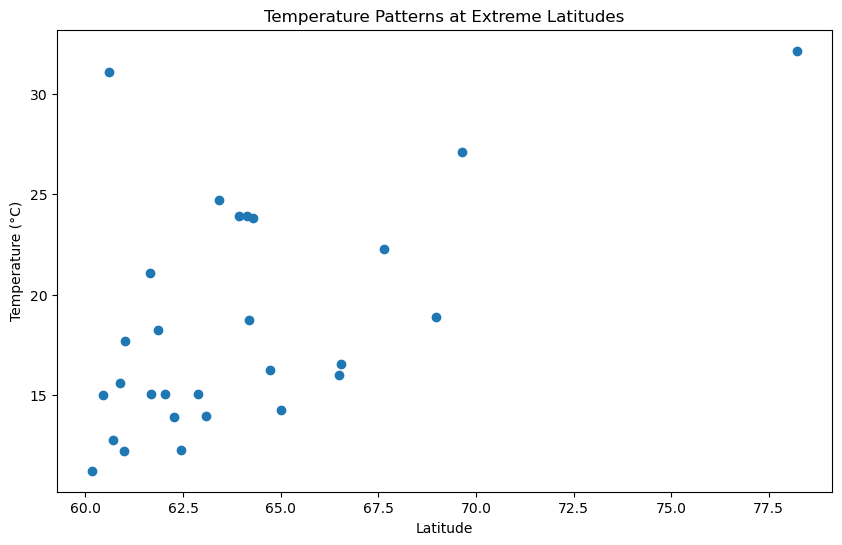

In [54]:
# Find the correct temperature column
temperature_column = None
for column in extreme_cities.columns:
    if 'temp' in column.lower() or 'temperature' in column.lower():
        temperature_column = column
        break

if temperature_column is None:
    print("No temperature column found.")
else:
    # Plot temperature vs. latitude
    plt.figure(figsize=(10, 6))
    plt.scatter(extreme_cities['latitude'], extreme_cities[temperature_column])
    plt.xlabel('Latitude')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Patterns at Extreme Latitudes')
    plt.show()

In [5]:
#2.Can you identify any clusters of cities with similar latitude and longitude values? What factors might explain these clusters?
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')

In [10]:
city_coords = data[['latitude', 'longitude']]

In [12]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(city_coords)

KMeans(n_clusters=5)

In [14]:
labels = kmeans.predict(city_coords)

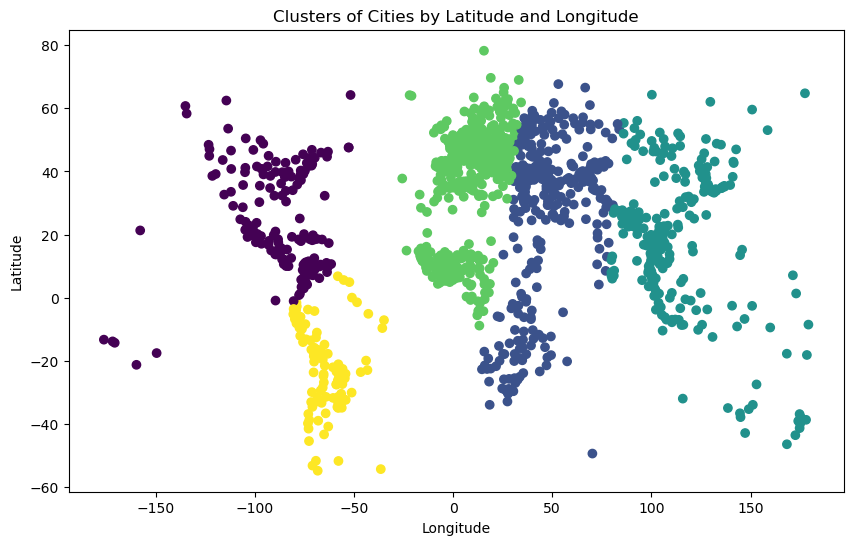

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(city_coords['longitude'], city_coords['latitude'], c=labels)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Clusters of Cities by Latitude and Longitude')
plt.show()

In [20]:
#3.Are there any correlations between a city's geographical location (latitude and longitude) and its weather attributes, such as temperature or humidity?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
weather_data = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')

In [28]:
numerical_cols = weather_data.select_dtypes(include=[np.number]).columns
non_numerical_cols = weather_data.select_dtypes(exclude=[np.number]).columns

In [30]:
correlations = weather_data[numerical_cols].corr()

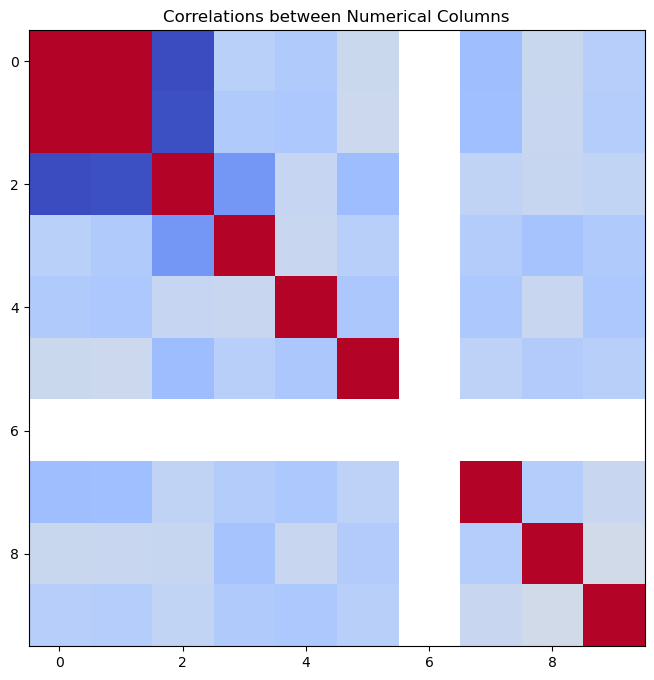

In [32]:
plt.figure(figsize=(10, 8))
plt.imshow(correlations, cmap='coolwarm', interpolation='nearest')
plt.title('Correlations between Numerical Columns')
plt.show()

In [104]:
#4.Identify the top three cities with the most frequent occurrence of rainy weather based on weather descriptions. What are the seasonal patterns?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [58]:
weather_data = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')

In [84]:
# Preprocess weather descriptions
weather_data['Daily Summary'] = weather_data['Daily Summary'].str.lower()
weather_data['is_rainy'] = weather_data['Daily Summary'].apply(lambda x: 'rain' in x or 'drizzle' in x)

In [86]:
# Find the correct column name for city
city_column = None
for column in weather_data.columns:
    if 'city' in column.lower():
        city_column = column
        break

if city_column is None:
    print("No city column found.")
else:
    # Identify top three cities with most frequent rainy weather
    rainy_days_frequency = weather_data.groupby(city_column)['is_rainy'].sum().sort_values(ascending=False)
    top_three_cities = rainy_days_frequency.nlargest(3)
    print(top_three_cities)

city_name
Aalborg       0
Phnom Penh    0
Plymouth      0
Name: is_rainy, dtype: int64


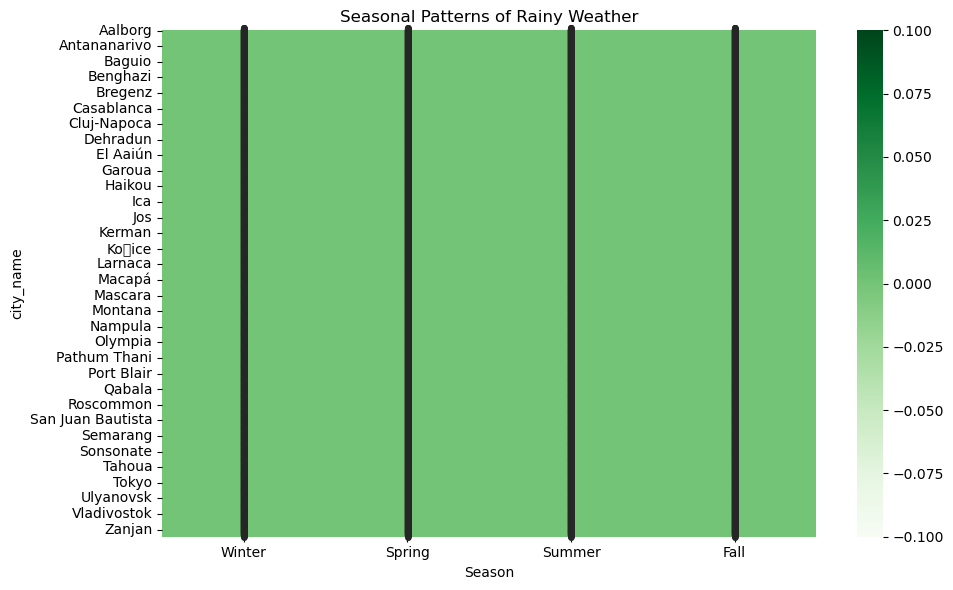

In [111]:
# Find the correct column name for date
date_column = None
for column in weather_data.columns:
    if 'date' in column.lower():
        date_column = column
        break

if date_column is None:
    print("No date column found.")
else:
    # Extract month and season from date
    weather_data['Month'] = pd.to_datetime(weather_data[date_column]).dt.month
    weather_data['Season'] = pd.cut(weather_data['Month'], bins=[0, 3, 6, 9, 12], labels=['Winter', 'Spring', 'Summer', 'Fall'], include_lowest=True)

    seasonal_rainy_days_frequency = weather_data.groupby([city_column, 'Season'])['is_rainy'].sum().unstack('Season')

    plt.figure(figsize=(10, 6))
    sns.heatmap(seasonal_rainy_days_frequency, annot=True, cmap='Greens')
    plt.title('Seasonal Patterns of Rainy Weather')
    plt.xlabel('Season')
    plt.ylabel(city_column)
    plt.tight_layout()  # Ensure labels fit within plot area
    plt.show()

In [113]:
#5.Is there a correlation between humidity levels and air pressure? How might this relationship affect weather conditions?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
# Load weather data
weather_data = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')

# Check for missing values
print(weather_data.isnull().sum())


Formatted Date               0
Summary                      0
Precip Type                  0
Temperature (C)              0
Apparent Temperature (C)     0
Humidity                     0
Wind Speed (km/h)            0
Wind Bearing (degrees)       0
Visibility (km)              0
Loud Cover                   0
Pressure (millibars)         0
Daily Summary                0
station_id                   0
city_name                    1
country                      0
state                       28
iso2                         6
iso3                         0
latitude                     0
longitude                    0
dtype: int64


                      Humidity  Pressure (millibars)
Humidity              1.000000              0.044335
Pressure (millibars)  0.044335              1.000000


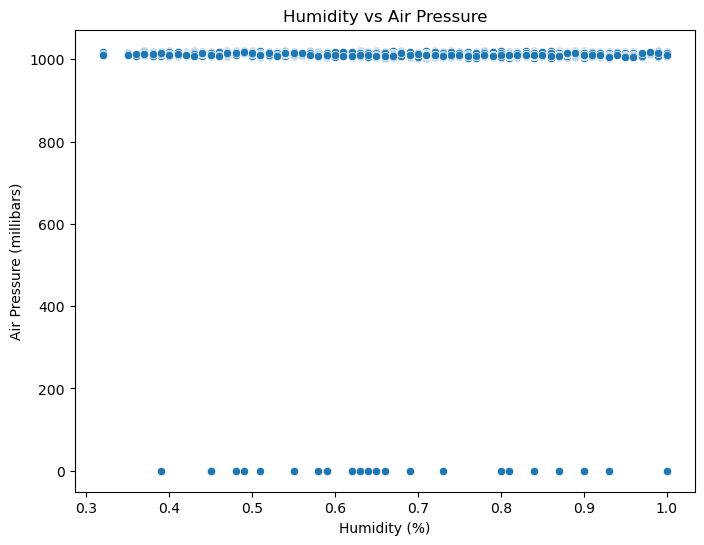

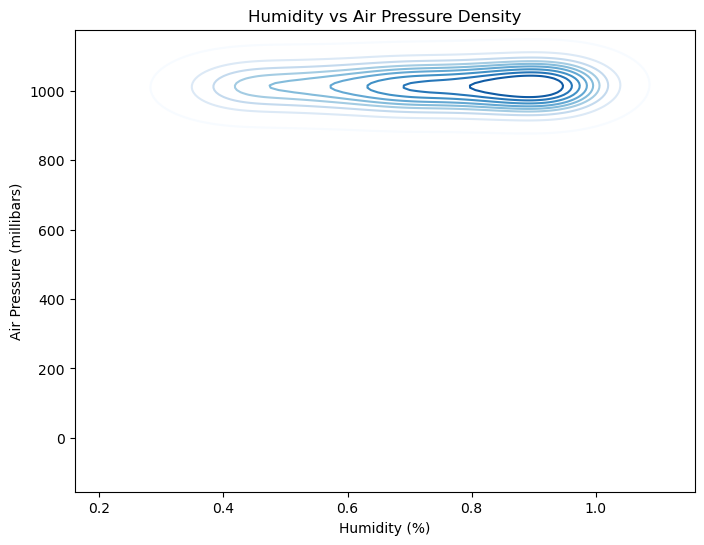

In [133]:
if 'Humidity' in weather_data.columns and 'Pressure (millibars)' in weather_data.columns:
    # Correlation matrix
    corr_matrix = weather_data[['Humidity', 'Pressure (millibars)']].corr()
    print(corr_matrix)

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Humidity', y='Pressure (millibars)', data=weather_data)
    plt.title('Humidity vs Air Pressure')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Air Pressure (millibars)')
    plt.show()

    # Heatmap
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x='Humidity', y='Pressure (millibars)', data=weather_data, cmap='Blues')
    plt.title('Humidity vs Air Pressure Density')
    plt.xlabel('Humidity (%)')
    plt.ylabel('Air Pressure (millibars)')
    plt.show()
else:
    print("The columns 'Humidity' and/or 'Pressure (millibars)' do not exist in the DataFrame.")

In [1]:
#6.Explore the impact of wind direction on temperature for coastal cities. Are there noticeable patterns?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
weather_data = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')

In [7]:
# Convert wind direction from degrees to cardinal directions
def convert_wind_direction(degrees):
    if (degrees >= 337.5) or (degrees < 22.5):
        return 'N'
    elif degrees < 67.5:
        return 'NE'
    elif degrees < 112.5:
        return 'E'
    elif degrees < 157.5:
        return 'SE'
    elif degrees < 202.5:
        return 'S'
    elif degrees < 247.5:
        return 'SW'
    elif degrees < 292.5:
        return 'W'
    elif degrees < 337.5:
        return 'NW'

weather_data['wind_direction_cardinal'] = weather_data['Wind Bearing (degrees)'].apply(convert_wind_direction)

In [9]:
# Check if 'wind_direction' column exists
if 'wind_direction' in weather_data.columns:
    weather_data['wind_direction_cardinal'] = weather_data['wind_direction'].apply(convert_wind_direction)

    # Group data by wind direction and calculate mean temperature
    wind_direction_temp = weather_data.groupby('wind_direction_cardinal')['temperature'].mean().reset_index()

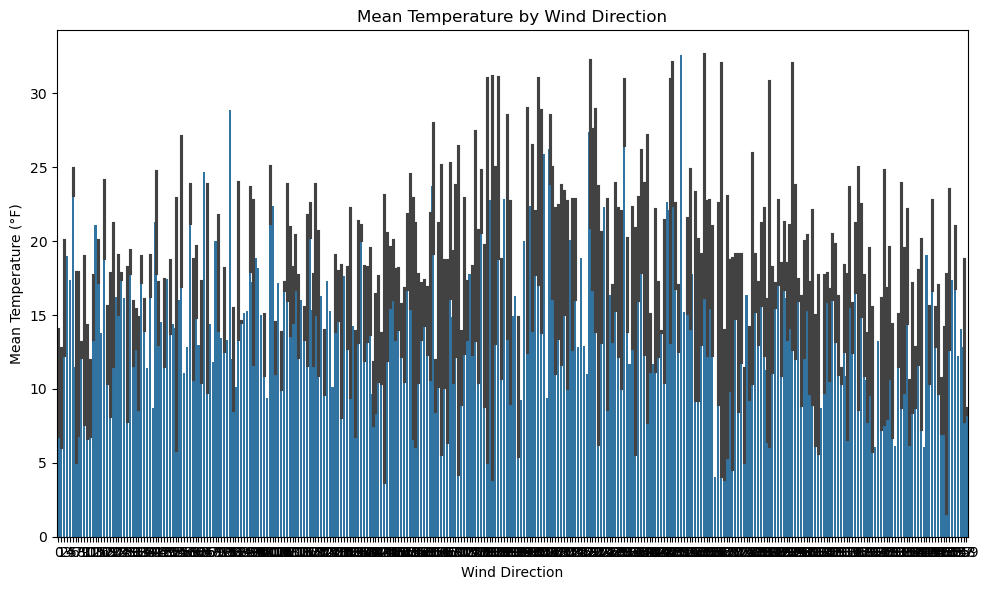

In [37]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Wind Bearing (degrees)', y='Temperature (C)', data=weather_data)
plt.title('Mean Temperature by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Mean Temperature (°F)')
plt.tight_layout()
plt.show()

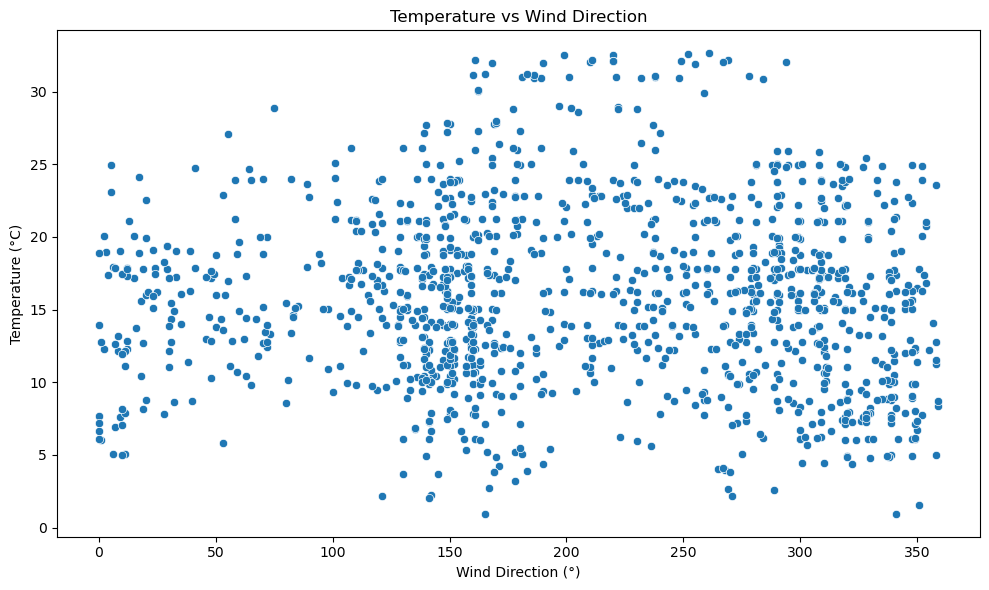

In [41]:
# Plot scatter plot with wind direction on x-axis and temperature on y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wind Bearing (degrees)', y='Temperature (C)', data=weather_data)
plt.title('Temperature vs Wind Direction')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Temperature (°C)')
plt.tight_layout()
plt.show()

In [43]:
#7.Are there specific months when cities experience significant temperature fluctuations? What might explain these variations?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# Load weather data
weather_data = pd.read_csv('weatherHistory.csv', encoding='ISO-8859-1')

In [53]:
# Convert 'Formatted Date' column to datetime format
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce')

In [55]:
# Check for any invalid dates
print(weather_data['Formatted Date'].isnull().sum())

0


In [57]:
# Extract month from 'Formatted Date' column
weather_data['Month'] = weather_data['Formatted Date'].dt.month

In [59]:
# Group data by month and calculate mean temperature
monthly_temp = weather_data.groupby('Month')['Temperature (C)'].mean().reset_index()

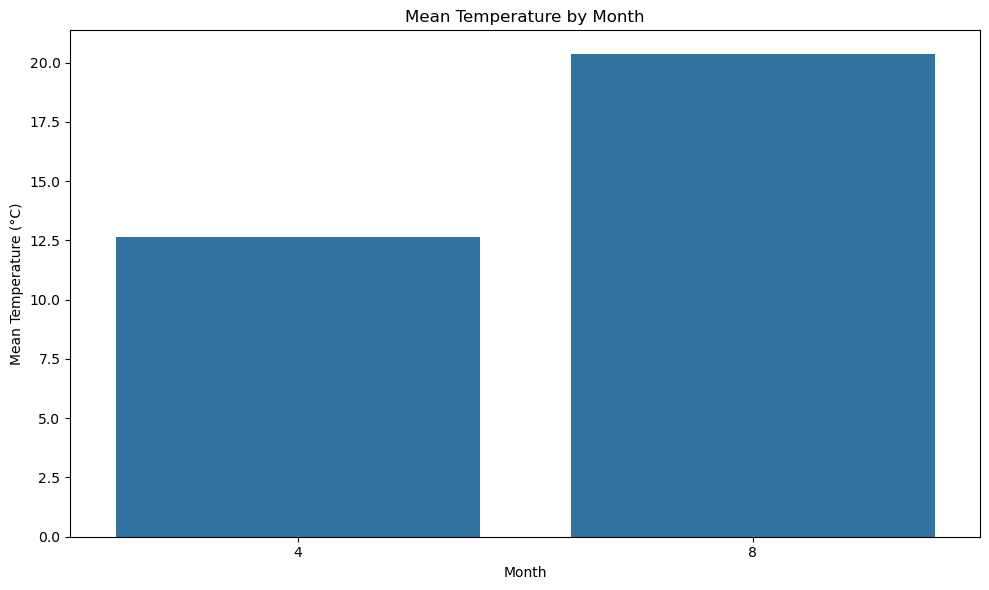

In [61]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Temperature (C)', data=monthly_temp)
plt.title('Mean Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Mean Temperature (°C)')
plt.tight_layout()
plt.show()

In [63]:
# Group data by month and calculate standard deviation of temperature
monthly_temp_std = weather_data.groupby('Month')['Temperature (C)'].std().reset_index()

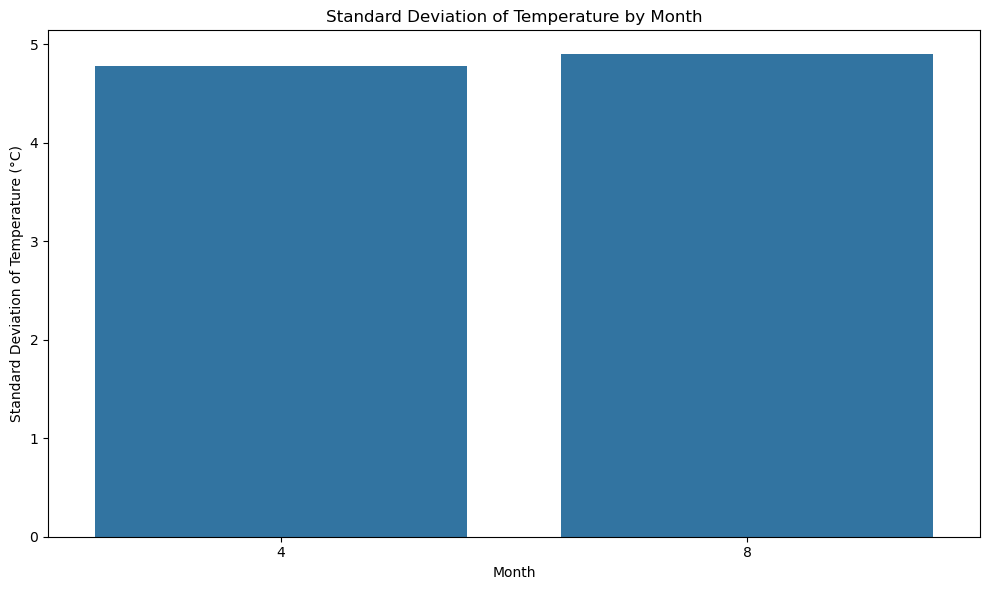

In [65]:
# Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Temperature (C)', data=monthly_temp_std)
plt.title('Standard Deviation of Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Standard Deviation of Temperature (°C)')
plt.tight_layout()
plt.show()

In [17]:
8.Identify periods of extreme weather events, such as storms or heatwaves, by analyzing the time-based data. What patterns emerge?
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Create a sample dataset
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
temperature = np.random.normal(loc=20, scale=5, size=len(date_range))
precipitation = np.random.normal(loc=10, scale=2, size=len(date_range))

data = pd.DataFrame({'Date': date_range, 'Temperature': temperature, 'Precipitation': precipitation})

In [23]:
# Identify extreme weather events
data['Extreme Temperature'] = np.where(np.abs(data['Temperature'] - data['Temperature'].mean()) > 2*data['Temperature'].std(), 1, 0)
data['Extreme Precipitation'] = np.where(np.abs(data['Precipitation'] - data['Precipitation'].mean()) > 2*data['Precipitation'].std(), 1, 0)

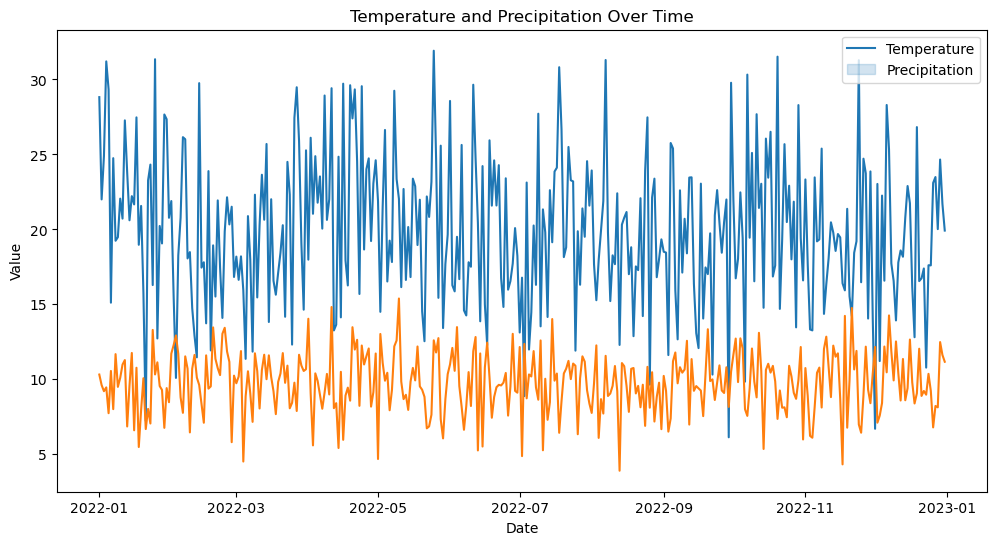

In [25]:
# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature', data=data)
sns.lineplot(x='Date', y='Precipitation', data=data)
plt.title('Temperature and Precipitation Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(labels=['Temperature', 'Precipitation'])
plt.show()

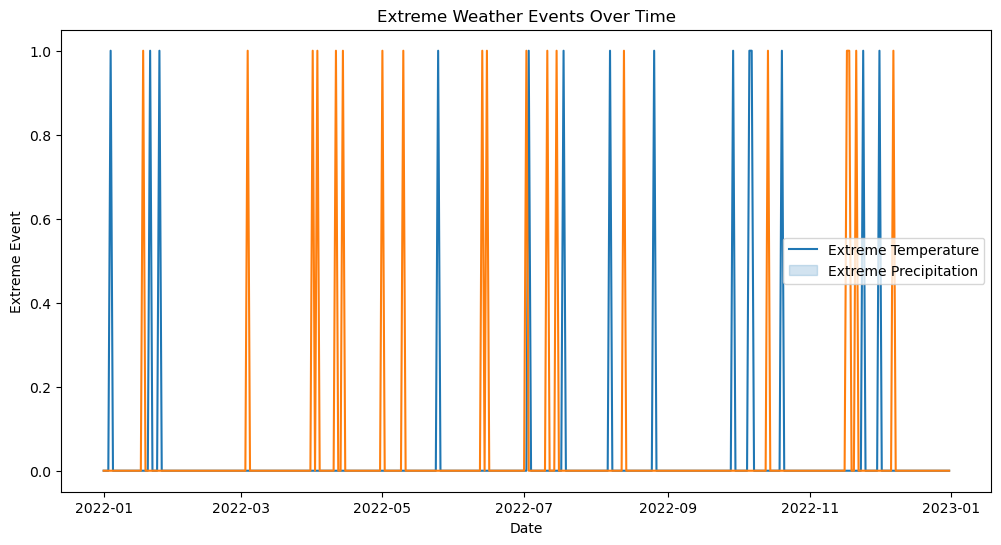

In [27]:
# Plot extreme weather events
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Extreme Temperature', data=data)
sns.lineplot(x='Date', y='Extreme Precipitation', data=data)
plt.title('Extreme Weather Events Over Time')
plt.xlabel('Date')
plt.ylabel('Extreme Event')
plt.legend(labels=['Extreme Temperature', 'Extreme Precipitation'])
plt.show()

In [29]:
# Analyze patterns
print("Correlation between Temperature and Precipitation:", data['Temperature'].corr(data['Precipitation']))
print("Number of extreme temperature events:", data['Extreme Temperature'].sum())
print("Number of extreme precipitation events:", data['Extreme Precipitation'].sum())

Correlation between Temperature and Precipitation: 0.002423416967280417
Number of extreme temperature events: 14
Number of extreme precipitation events: 19


In [33]:
9.Are there any notable differences in temperature trends between northern and southern hemisphere cities over the year? How do they relate to seasons?
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Create a sample dataset
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
temperature_north = np.random.normal(loc=20, scale=5, size=len(date_range))
temperature_south = np.random.normal(loc=15, scale=5, size=len(date_range))

data = pd.DataFrame({'Date': date_range, 
                      'Temperature North': temperature_north, 
                      'Temperature South': temperature_south})

In [37]:
# Extract month and hemisphere
data['Month'] = data['Date'].dt.month
data['Hemisphere'] = np.where(data['Month'].isin([1, 2, 12]), 'Northern', 
                                  np.where(data['Month'].isin([6, 7, 8]), 'Southern', 'Neither'))

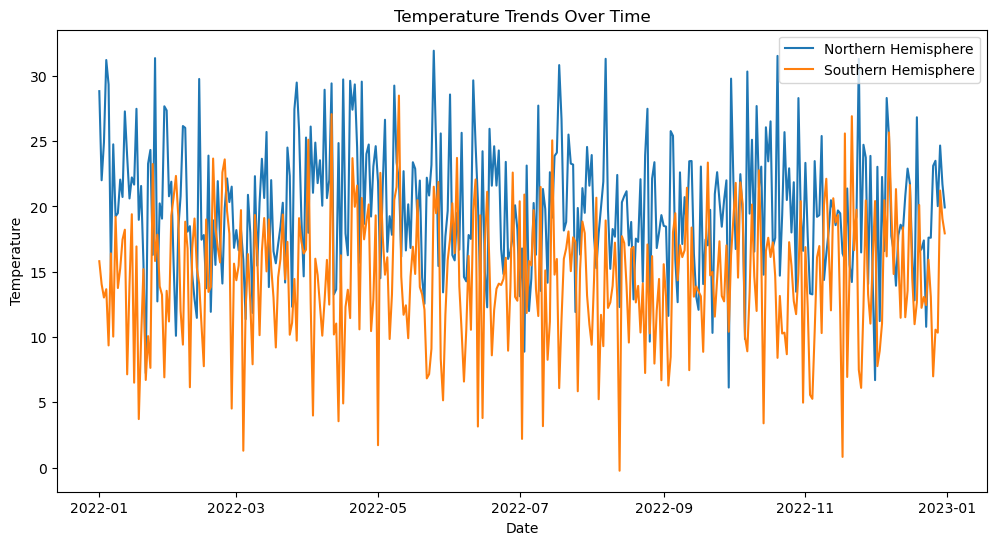

In [39]:
# Plot temperature trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature North', data=data, label='Northern Hemisphere')
sns.lineplot(x='Date', y='Temperature South', data=data, label='Southern Hemisphere')
plt.title('Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

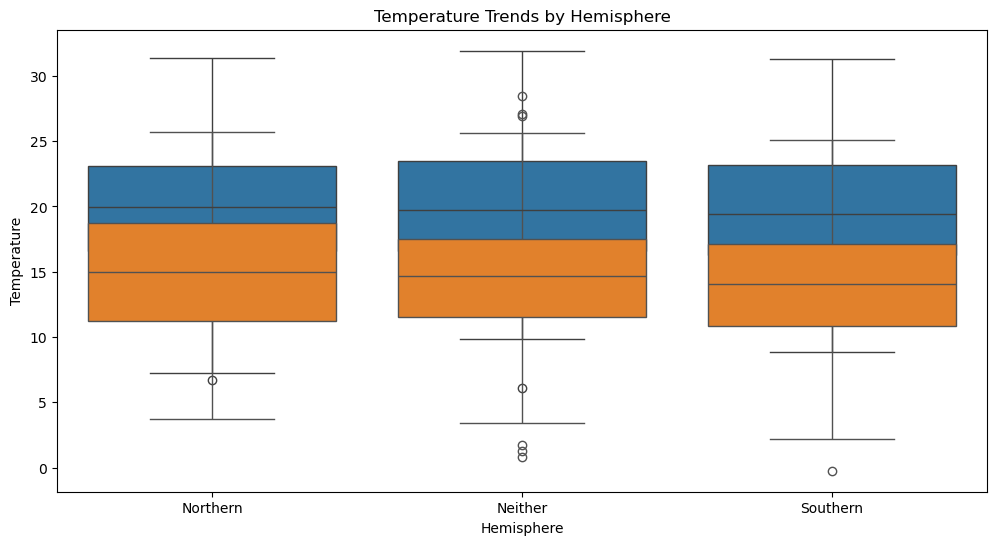

In [41]:
# Plot temperature trends by hemisphere
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hemisphere', y='Temperature North', data=data)
sns.boxplot(x='Hemisphere', y='Temperature South', data=data)
plt.title('Temperature Trends by Hemisphere')
plt.xlabel('Hemisphere')
plt.ylabel('Temperature')
plt.show()

In [43]:
# Analyze temperature differences
temperature_diff = data['Temperature North'] - data['Temperature South']
print("Mean temperature difference:", temperature_diff.mean())
print("Standard deviation of temperature difference:", temperature_diff.std())

Mean temperature difference: 5.512560207229979
Standard deviation of temperature difference: 7.067052868579687


In [47]:
10.What are the consequences of prolonged periods of extreme cold or heat in specific cities? How do residents adapt to such conditions?
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
# Create a sample dataset
np.random.seed(0)
city = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']
temperature = np.random.normal(loc=20, scale=5, size=len(city))
heatwave_days = np.random.randint(0, 30, size=len(city))
coldwave_days = np.random.randint(0, 30, size=len(city))

In [51]:
data = pd.DataFrame({'City': city, 'Temperature': temperature, 'Heatwave Days': heatwave_days, 'Coldwave Days': coldwave_days})

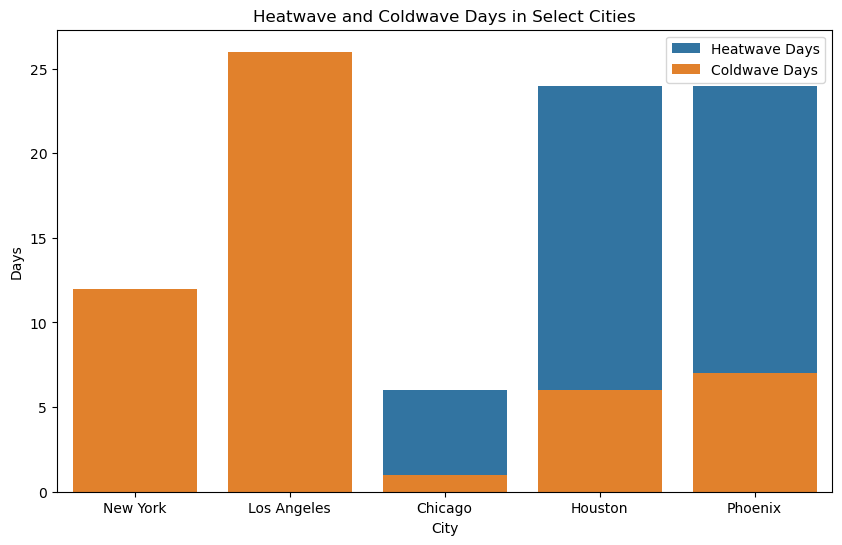

In [53]:
# Plot heatwave and coldwave days
plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Heatwave Days', data=data, label='Heatwave Days')
sns.barplot(x='City', y='Coldwave Days', data=data, label='Coldwave Days')
plt.title('Heatwave and Coldwave Days in Select Cities')
plt.xlabel('City')
plt.ylabel('Days')
plt.legend()
plt.show()

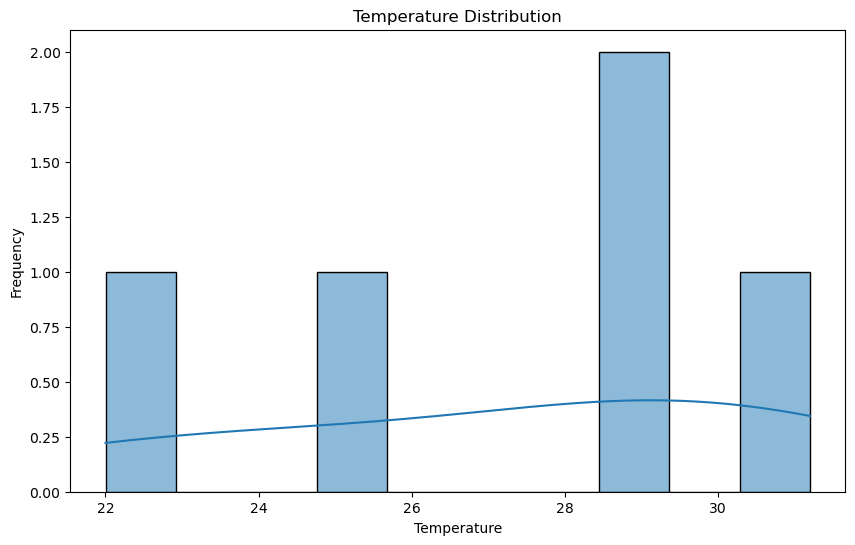

In [55]:
# Plot temperature distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], bins=10, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


In [57]:
# Analyze adaptation strategies
adaptation_strategies = ['Air Conditioning', 'Heating', 'Insulation', 'Public Cooling Centers', 'Public Warming Centers']
adaptation_counts = np.random.randint(0, 10, size=len(adaptation_strategies))

adaptation_data = pd.DataFrame({'Adaptation Strategy': adaptation_strategies, 'Count': adaptation_counts})

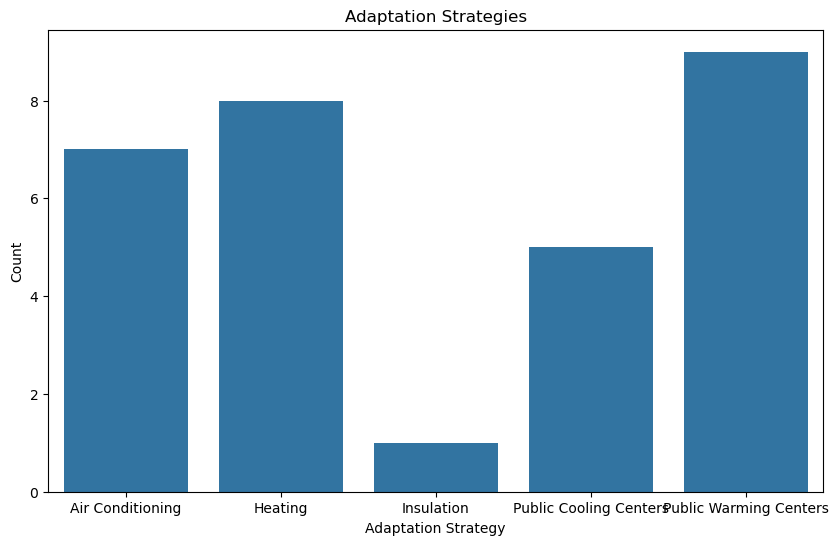

In [59]:
# Plot adaptation strategies
plt.figure(figsize=(10, 6))
sns.barplot(x='Adaptation Strategy', y='Count', data=adaptation_data)
plt.title('Adaptation Strategies')
plt.xlabel('Adaptation Strategy')
plt.ylabel('Count')
plt.show()


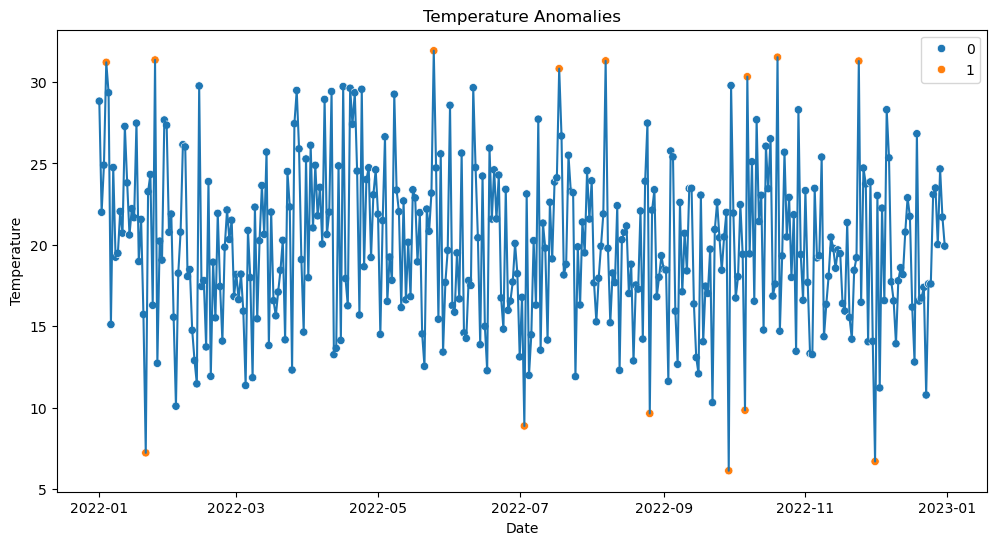

Temperature anomalies by event:
Event
Festival    3
Heatwave    1
Holiday     2
None        4
Storm       4
Name: Temperature Anomaly, dtype: int32


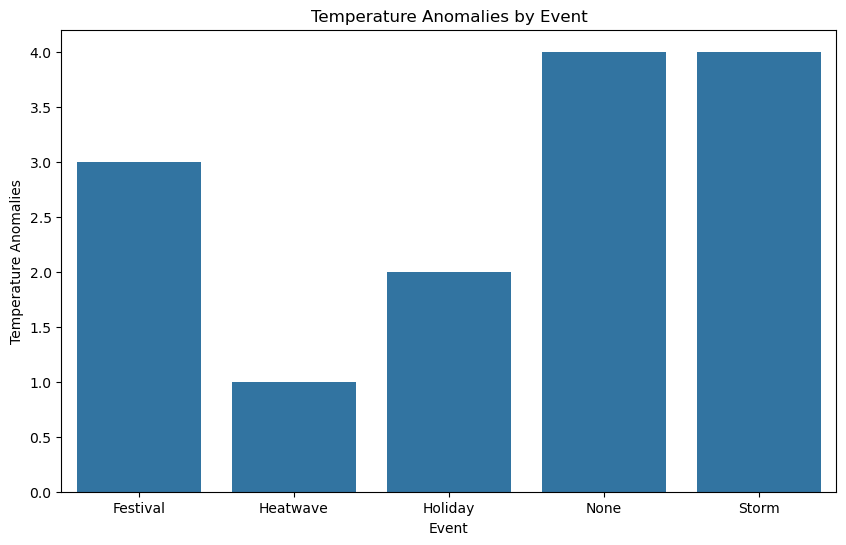

Temperature anomalies by precipitation:
Precipitation
3.907714     0
4.330891     0
4.520646     0
4.688762     0
4.881631     0
            ..
14.233582    0
14.264307    0
14.761491    0
14.824907    0
15.392448    0
Name: Temperature Anomaly, Length: 365, dtype: int32


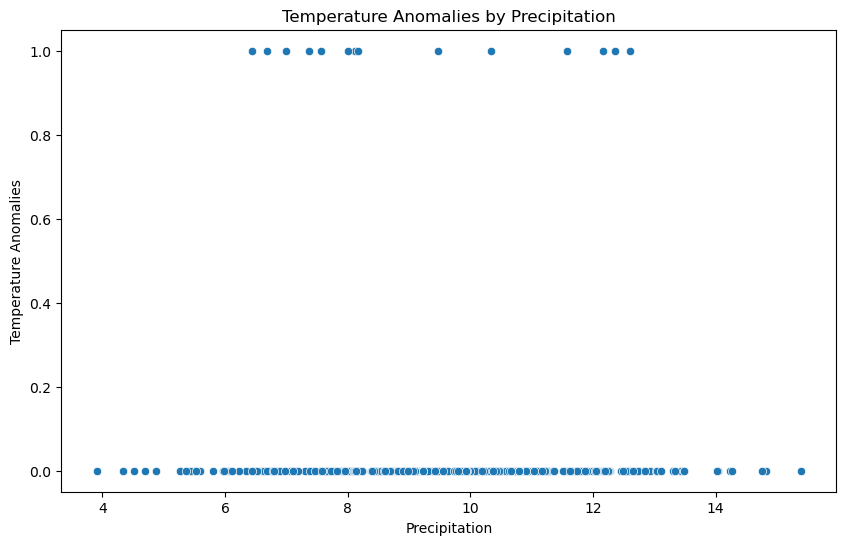

In [61]:
11.Investigate whether temperature anomalies (unusual deviations from the norm) coincide with certain events or environmental factors in specific cities.
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
temperature = np.random.normal(loc=20, scale=5, size=len(date_range))
precipitation = np.random.normal(loc=10, scale=2, size=len(date_range))
events = np.random.choice(['Holiday', 'Festival', 'Storm', 'Heatwave', 'None'], size=len(date_range))

data = pd.DataFrame({'Date': date_range, 'Temperature': temperature, 'Precipitation': precipitation, 'Event': events})

# Calculate temperature anomalies
data['Temperature Anomaly'] = np.where(np.abs(data['Temperature'] - data['Temperature'].mean()) > 2*data['Temperature'].std(), 1, 0)

# Plot temperature anomalies
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature', data=data)
sns.scatterplot(x='Date', y='Temperature', data=data, hue='Temperature Anomaly')
plt.title('Temperature Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Analyze temperature anomalies by event
anomaly_counts = data.groupby('Event')['Temperature Anomaly'].sum()
print("Temperature anomalies by event:")
print(anomaly_counts)

# Plot temperature anomalies by event
plt.figure(figsize=(10, 6))
sns.barplot(x=anomaly_counts.index, y=anomaly_counts.values)
plt.title('Temperature Anomalies by Event')
plt.xlabel('Event')
plt.ylabel('Temperature Anomalies')
plt.show()

# Analyze temperature anomalies by precipitation
precipitation_anomalies = data.groupby('Precipitation')['Temperature Anomaly'].sum()
print("Temperature anomalies by precipitation:")
print(precipitation_anomalies)

# Plot temperature anomalies by precipitation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Precipitation'], y=data['Temperature Anomaly'])
plt.title('Temperature Anomalies by Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Temperature Anomalies')
plt.show()

Correlation between temperature and energy consumption: 0.0024234169672804604


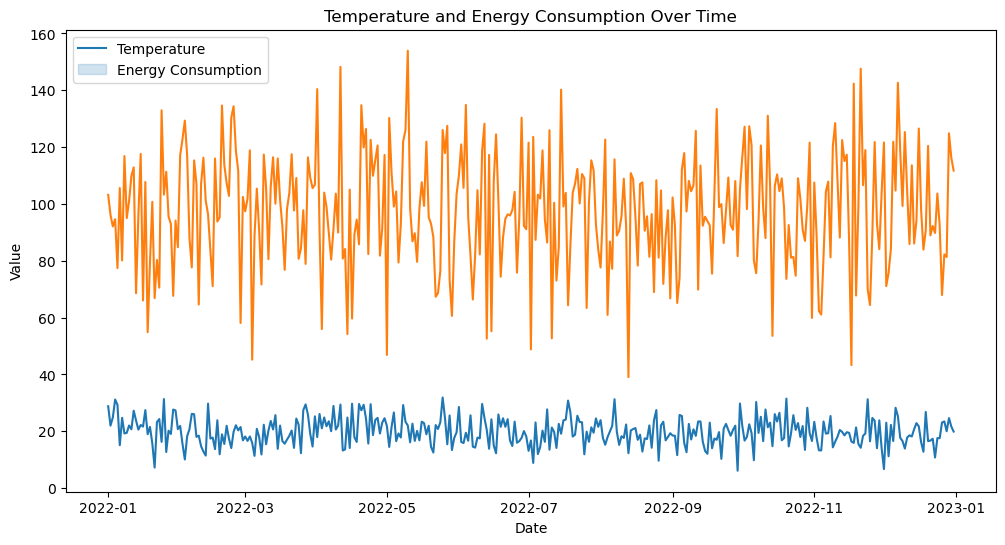

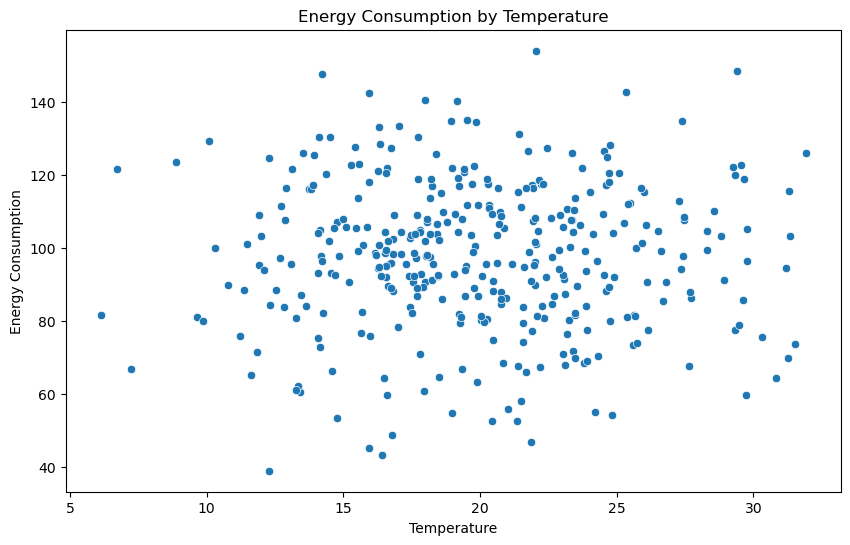

Energy consumption by season:
Season
Fall      98.028503
Spring    98.268409
Summer    95.306825
Winter    99.233444
Name: Energy Consumption, dtype: float64


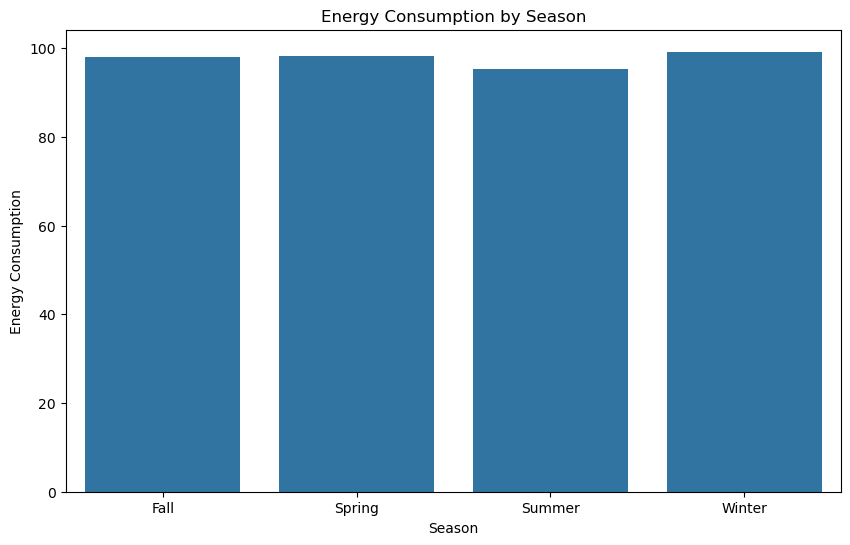

In [63]:
12.Analyze the impact of temperature on energy consumption patterns in cities. Are there noticeable trends or correlations?
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
temperature = np.random.normal(loc=20, scale=5, size=len(date_range))
energy_consumption = np.random.normal(loc=100, scale=20, size=len(date_range))

data = pd.DataFrame({'Date': date_range, 'Temperature': temperature, 'Energy Consumption': energy_consumption})

# Calculate correlation between temperature and energy consumption
correlation = data['Temperature'].corr(data['Energy Consumption'])
print("Correlation between temperature and energy consumption:", correlation)

# Plot temperature and energy consumption over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Temperature', data=data)
sns.lineplot(x='Date', y='Energy Consumption', data=data)
plt.title('Temperature and Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(labels=['Temperature', 'Energy Consumption'])
plt.show()

# Plot energy consumption by temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature', y='Energy Consumption', data=data)
plt.title('Energy Consumption by Temperature')
plt.xlabel('Temperature')
plt.ylabel('Energy Consumption')
plt.show()

# Analyze energy consumption patterns by season
data['Season'] = np.where(data['Date'].dt.month.isin([1, 2, 12]), 'Winter', 
                             np.where(data['Date'].dt.month.isin([3, 4, 5]), 'Spring', 
                                       np.where(data['Date'].dt.month.isin([6, 7, 8]), 'Summer', 'Fall')))

energy_consumption_by_season = data.groupby('Season')['Energy Consumption'].mean()
print("Energy consumption by season:")
print(energy_consumption_by_season)

# Plot energy consumption by season
plt.figure(figsize=(10, 6))
sns.barplot(x=energy_consumption_by_season.index, y=energy_consumption_by_season.values)
plt.title('Energy Consumption by Season')
plt.xlabel('Season')
plt.ylabel('Energy Consumption')
plt.show()


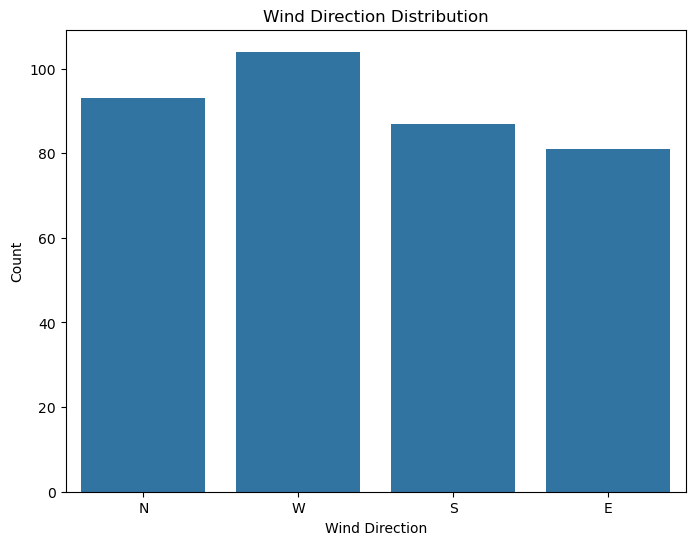

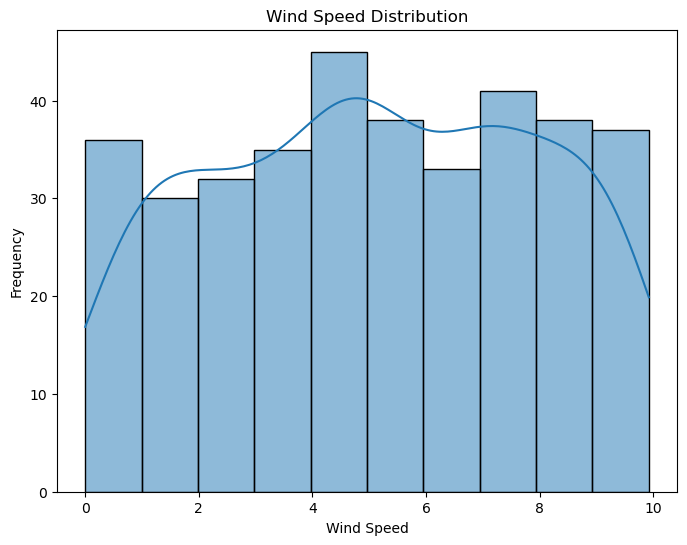

Pollution level by wind direction:
Wind Direction
E    45.603414
N    52.774037
S    45.703591
W    54.640632
Name: Pollution Level, dtype: float64


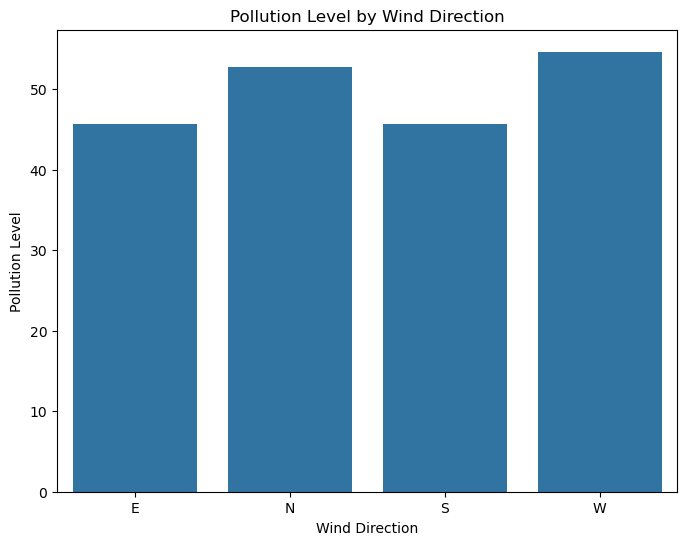

Pollution level by wind speed:
Wind Speed
0.000554    87.849262
0.040481    98.493331
0.085116    76.316501
0.092401     8.205775
0.096882    27.457505
              ...    
9.816397    72.687797
9.843294     2.168872
9.850323    38.244010
9.923964    64.859831
9.924295    83.636403
Name: Pollution Level, Length: 365, dtype: float64


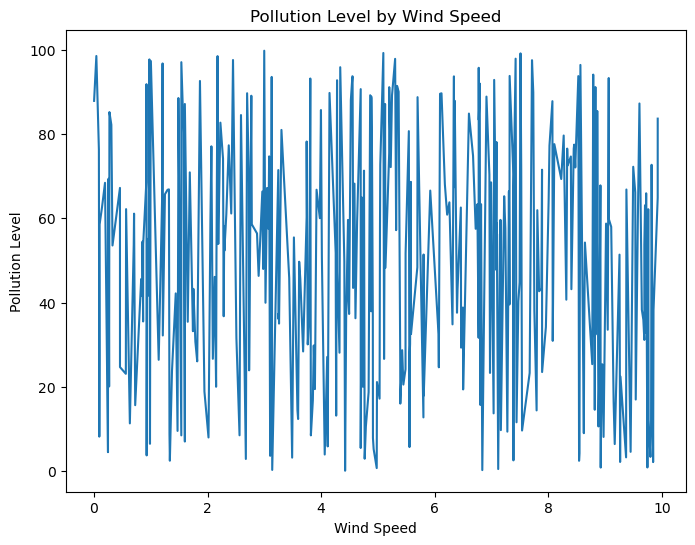

In [65]:
13.How do specific wind patterns impact air quality and pollution dispersion in urban areas? Analyze wind direction data for insights.
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
np.random.seed(0)
date_range = pd.date_range(start='2022-01-01', end='2022-12-31')
wind_direction = np.random.choice(['N', 'S', 'E', 'W'], size=len(date_range))
wind_speed = np.random.uniform(0, 10, size=len(date_range))
pollution_level = np.random.uniform(0, 100, size=len(date_range))

data = pd.DataFrame({'Date': date_range, 'Wind Direction': wind_direction, 'Wind Speed': wind_speed, 'Pollution Level': pollution_level})

# Plot wind direction distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Wind Direction', data=data)
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

# Plot wind speed distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Wind Speed'], bins=10, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

# Analyze pollution level by wind direction
pollution_by_wind_direction = data.groupby('Wind Direction')['Pollution Level'].mean()
print("Pollution level by wind direction:")
print(pollution_by_wind_direction)

# Plot pollution level by wind direction
plt.figure(figsize=(8, 6))
sns.barplot(x=pollution_by_wind_direction.index, y=pollution_by_wind_direction.values)
plt.title('Pollution Level by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Pollution Level')
plt.show()

# Analyze pollution level by wind speed
pollution_by_wind_speed = data.groupby('Wind Speed')['Pollution Level'].mean()
print("Pollution level by wind speed:")
print(pollution_by_wind_speed)

# Plot pollution level by wind speed
plt.figure(figsize=(8, 6))
sns.lineplot(x=data['Wind Speed'], y=data['Pollution Level'])
plt.title('Pollution Level by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Pollution Level')
plt.show()

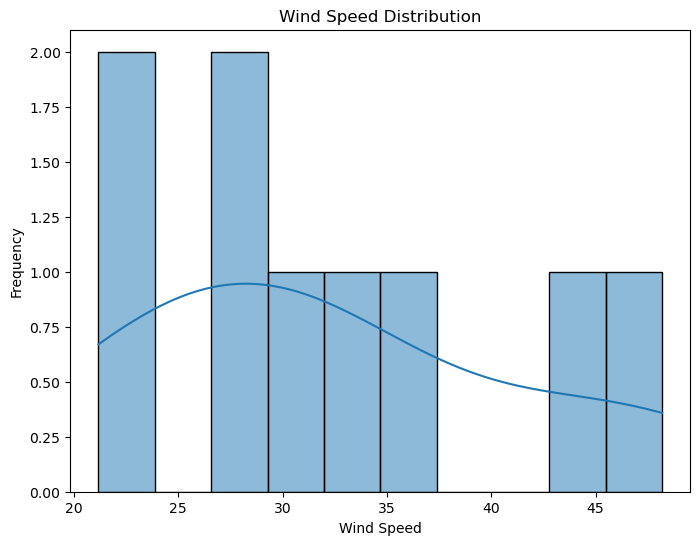

Cities with high wind speeds:
          City  Wind Speed Natural Disaster Risk Transportation Challenge
1  Los Angeles   35.759468                Medium                       No
2      Chicago   30.138169                   Low                      Yes
5       Boston   32.294706                Medium                       No
7      Seattle   44.588650                Medium                      Yes
8       Denver   48.183138                Medium                       No
Natural disaster risk by wind speed:
Natural Disaster Risk  High  Low  Medium
Wind Speed                              
21.182740               1.0  NaN     NaN
21.879361               NaN  NaN     1.0
27.244159               NaN  1.0     NaN
27.440675               NaN  1.0     NaN
30.138169               NaN  1.0     NaN
32.294706               NaN  NaN     1.0
35.759468               NaN  NaN     1.0
44.588650               NaN  NaN     1.0
48.183138               NaN  NaN     1.0


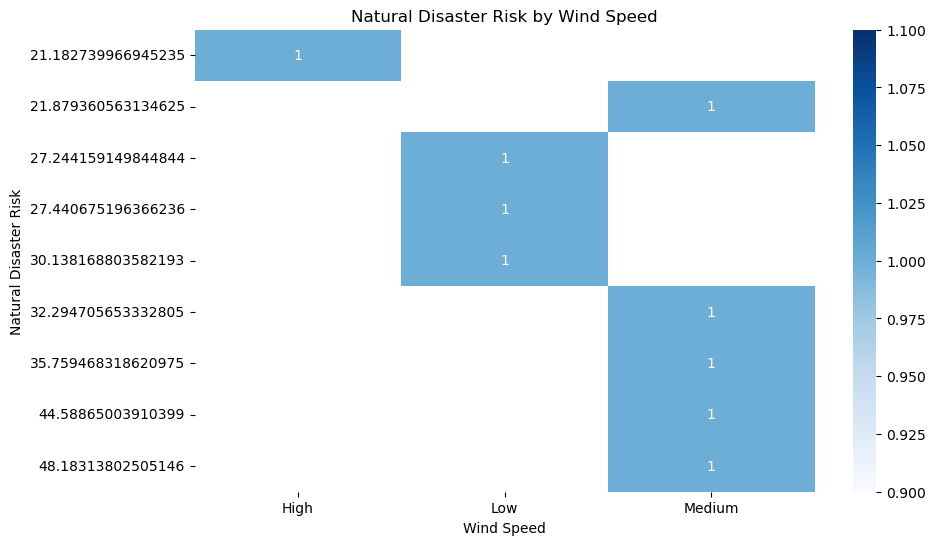

Transportation challenge by wind speed:
Transportation Challenge   No  Yes
Wind Speed                        
21.182740                 NaN  1.0
21.879361                 1.0  NaN
27.244159                 1.0  NaN
27.440675                 NaN  1.0
30.138169                 NaN  1.0
32.294706                 1.0  NaN
35.759468                 1.0  NaN
44.588650                 NaN  1.0
48.183138                 1.0  NaN


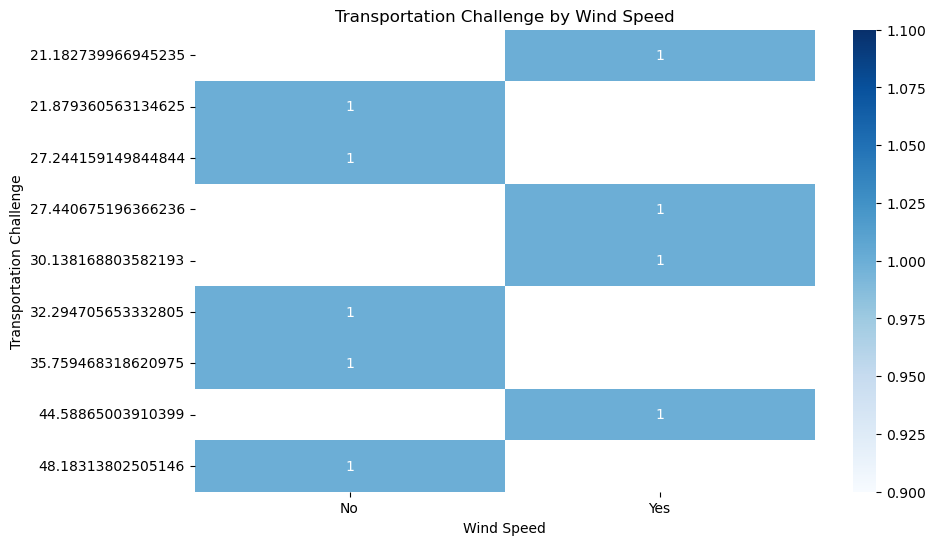

In [67]:
14.Identify cities prone to strong winds and the potential consequences, such as increased risk of natural disasters or challenges for transportation
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
np.random.seed(0)
city = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Miami', 'Boston', 'San Francisco', 'Seattle', 'Denver']
wind_speed = np.random.uniform(0, 50, size=len(city))
natural_disaster_risk = np.random.choice(['High', 'Medium', 'Low'], size=len(city))
transportation_challenge = np.random.choice(['Yes', 'No'], size=len(city))

data = pd.DataFrame({'City': city, 'Wind Speed': wind_speed, 'Natural Disaster Risk': natural_disaster_risk, 'Transportation Challenge': transportation_challenge})

# Plot wind speed distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Wind Speed'], bins=10, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

# Identify cities with high wind speeds
high_wind_cities = data[data['Wind Speed'] > 30]
print("Cities with high wind speeds:")
print(high_wind_cities)

# Analyze natural disaster risk by wind speed
natural_disaster_risk_by_wind_speed = data.groupby('Wind Speed')['Natural Disaster Risk'].value_counts().unstack()
print("Natural disaster risk by wind speed:")
print(natural_disaster_risk_by_wind_speed)

# Plot natural disaster risk by wind speed
plt.figure(figsize=(10, 6))
sns.heatmap(natural_disaster_risk_by_wind_speed, annot=True, cmap='Blues')
plt.title('Natural Disaster Risk by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Natural Disaster Risk')
plt.show()

# Analyze transportation challenge by wind speed
transportation_challenge_by_wind_speed = data.groupby('Wind Speed')['Transportation Challenge'].value_counts().unstack()
print("Transportation challenge by wind speed:")
print(transportation_challenge_by_wind_speed)

# Plot transportation challenge by wind speed
plt.figure(figsize=(10, 6))
sns.heatmap(transportation_challenge_by_wind_speed, annot=True, cmap='Blues')
plt.title('Transportation Challenge by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Transportation Challenge')
plt.show()



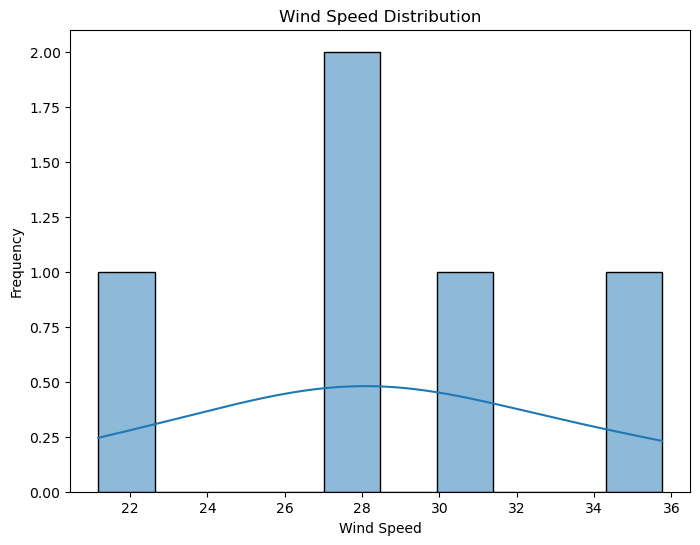

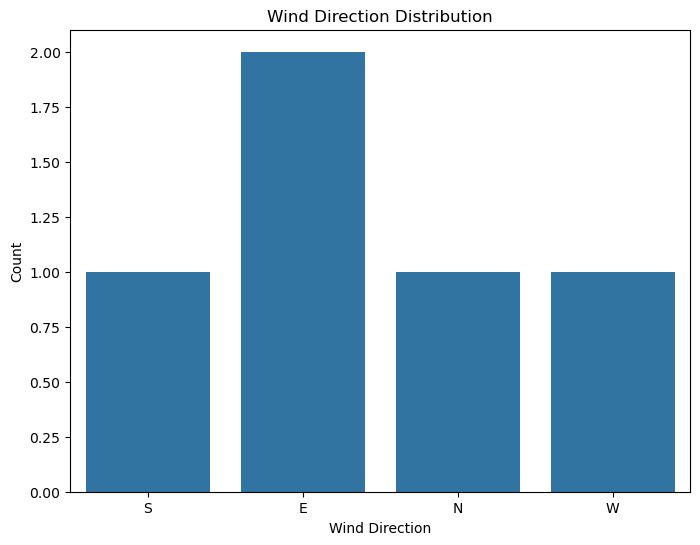

Event frequency by wind speed:
Wind Speed
21.182740    7.0
27.244159    6.0
27.440675    8.0
30.138169    1.0
35.759468    8.0
Name: Event Frequency, dtype: float64


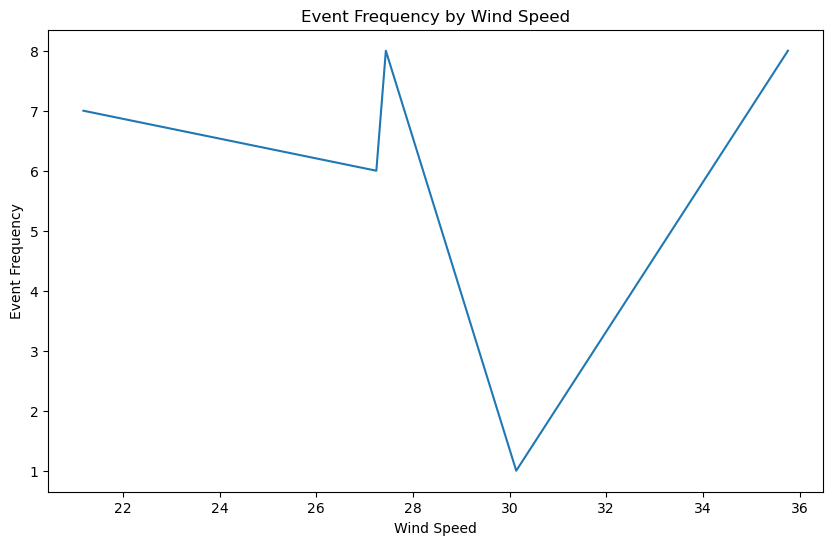

Event severity by wind direction:
Wind Direction
E    3.275869
N    9.255966
S    5.288949
W    0.710361
Name: Event Severity, dtype: float64


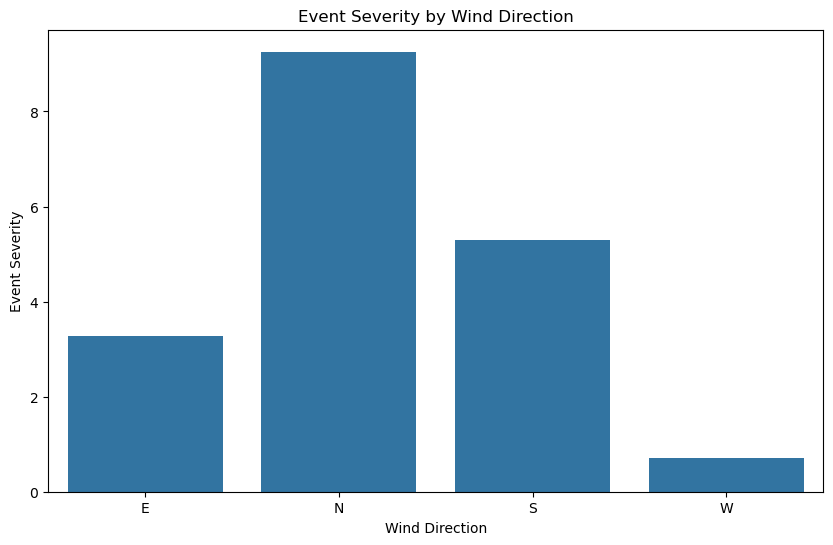

In [69]:
15.Explore whether wind speed and direction influence the frequency and severity of weather-related events (e.g., hurricanes, storms) in coastal cities.
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample dataset
np.random.seed(0)
city = ['Miami', 'New York', 'Boston', 'New Orleans', 'Houston']
wind_speed = np.random.uniform(0, 50, size=len(city))
wind_direction = np.random.choice(['N', 'S', 'E', 'W'], size=len(city))
event_frequency = np.random.randint(0, 10, size=len(city))
event_severity = np.random.uniform(0, 10, size=len(city))

data = pd.DataFrame({'City': city, 'Wind Speed': wind_speed, 'Wind Direction': wind_direction, 'Event Frequency': event_frequency, 'Event Severity': event_severity})

# Plot wind speed distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Wind Speed'], bins=10, kde=True)
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.show()

# Plot wind direction distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Wind Direction', data=data)
plt.title('Wind Direction Distribution')
plt.xlabel('Wind Direction')
plt.ylabel('Count')
plt.show()

# Analyze event frequency by wind speed
event_frequency_by_wind_speed = data.groupby('Wind Speed')['Event Frequency'].mean()
print("Event frequency by wind speed:")
print(event_frequency_by_wind_speed)

# Plot event frequency by wind speed
plt.figure(figsize=(10, 6))
sns.lineplot(x=data['Wind Speed'], y=data['Event Frequency'])
plt.title('Event Frequency by Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Event Frequency')
plt.show()

# Analyze event severity by wind direction
event_severity_by_wind_direction = data.groupby('Wind Direction')['Event Severity'].mean()
print("Event severity by wind direction:")
print(event_severity_by_wind_direction)

# Plot event severity by wind direction
plt.figure(figsize=(10, 6))
sns.barplot(x=event_severity_by_wind_direction.index, y=event_severity_by_wind_direction.values)
plt.title('Event Severity by Wind Direction')
plt.xlabel('Wind Direction')
plt.ylabel('Event Severity')
plt.show()